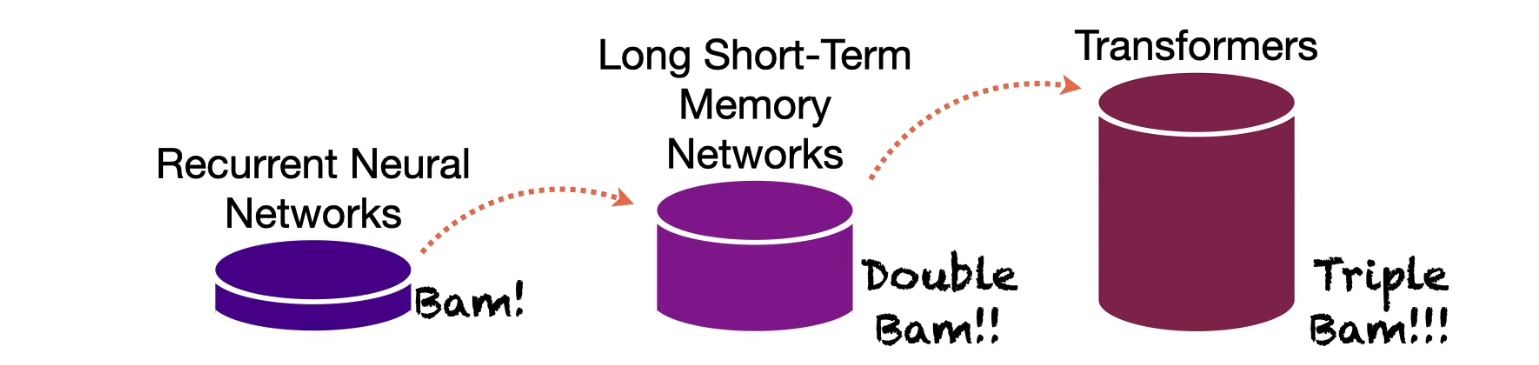

#### A implementaion of [Long Short-Term Memory (LSTM), Clearly Explained](https://www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=16)

## LSTM
To fix the error of The Vanishin/Exploding Gradients problem we will use LSTM


### Breakdown of what everything means


* Green line represents the longterm memory and is called the Cell State
* The Pink line is the short term memory and is connected to weights
* The orange line is Tanh Activation -1 and 1
* The Blue line is Sigmoid Activation 0 and 1

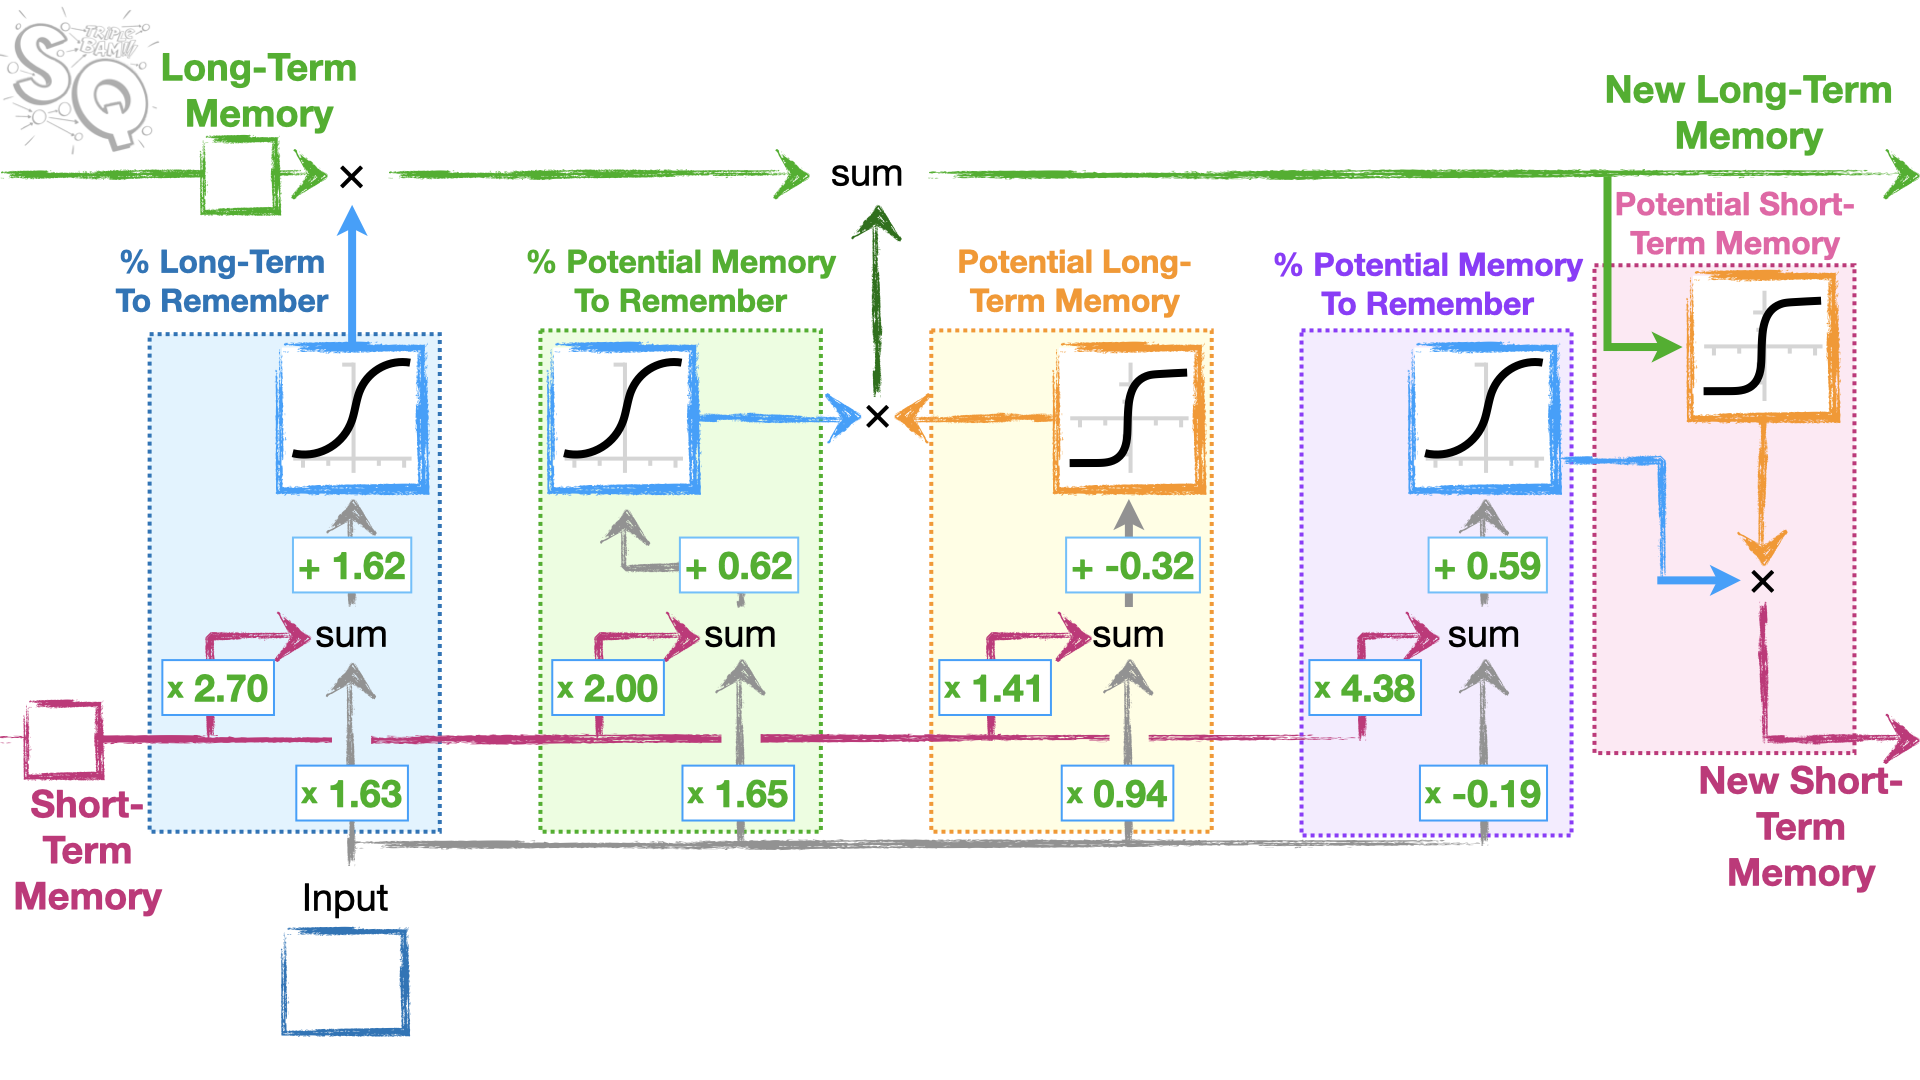

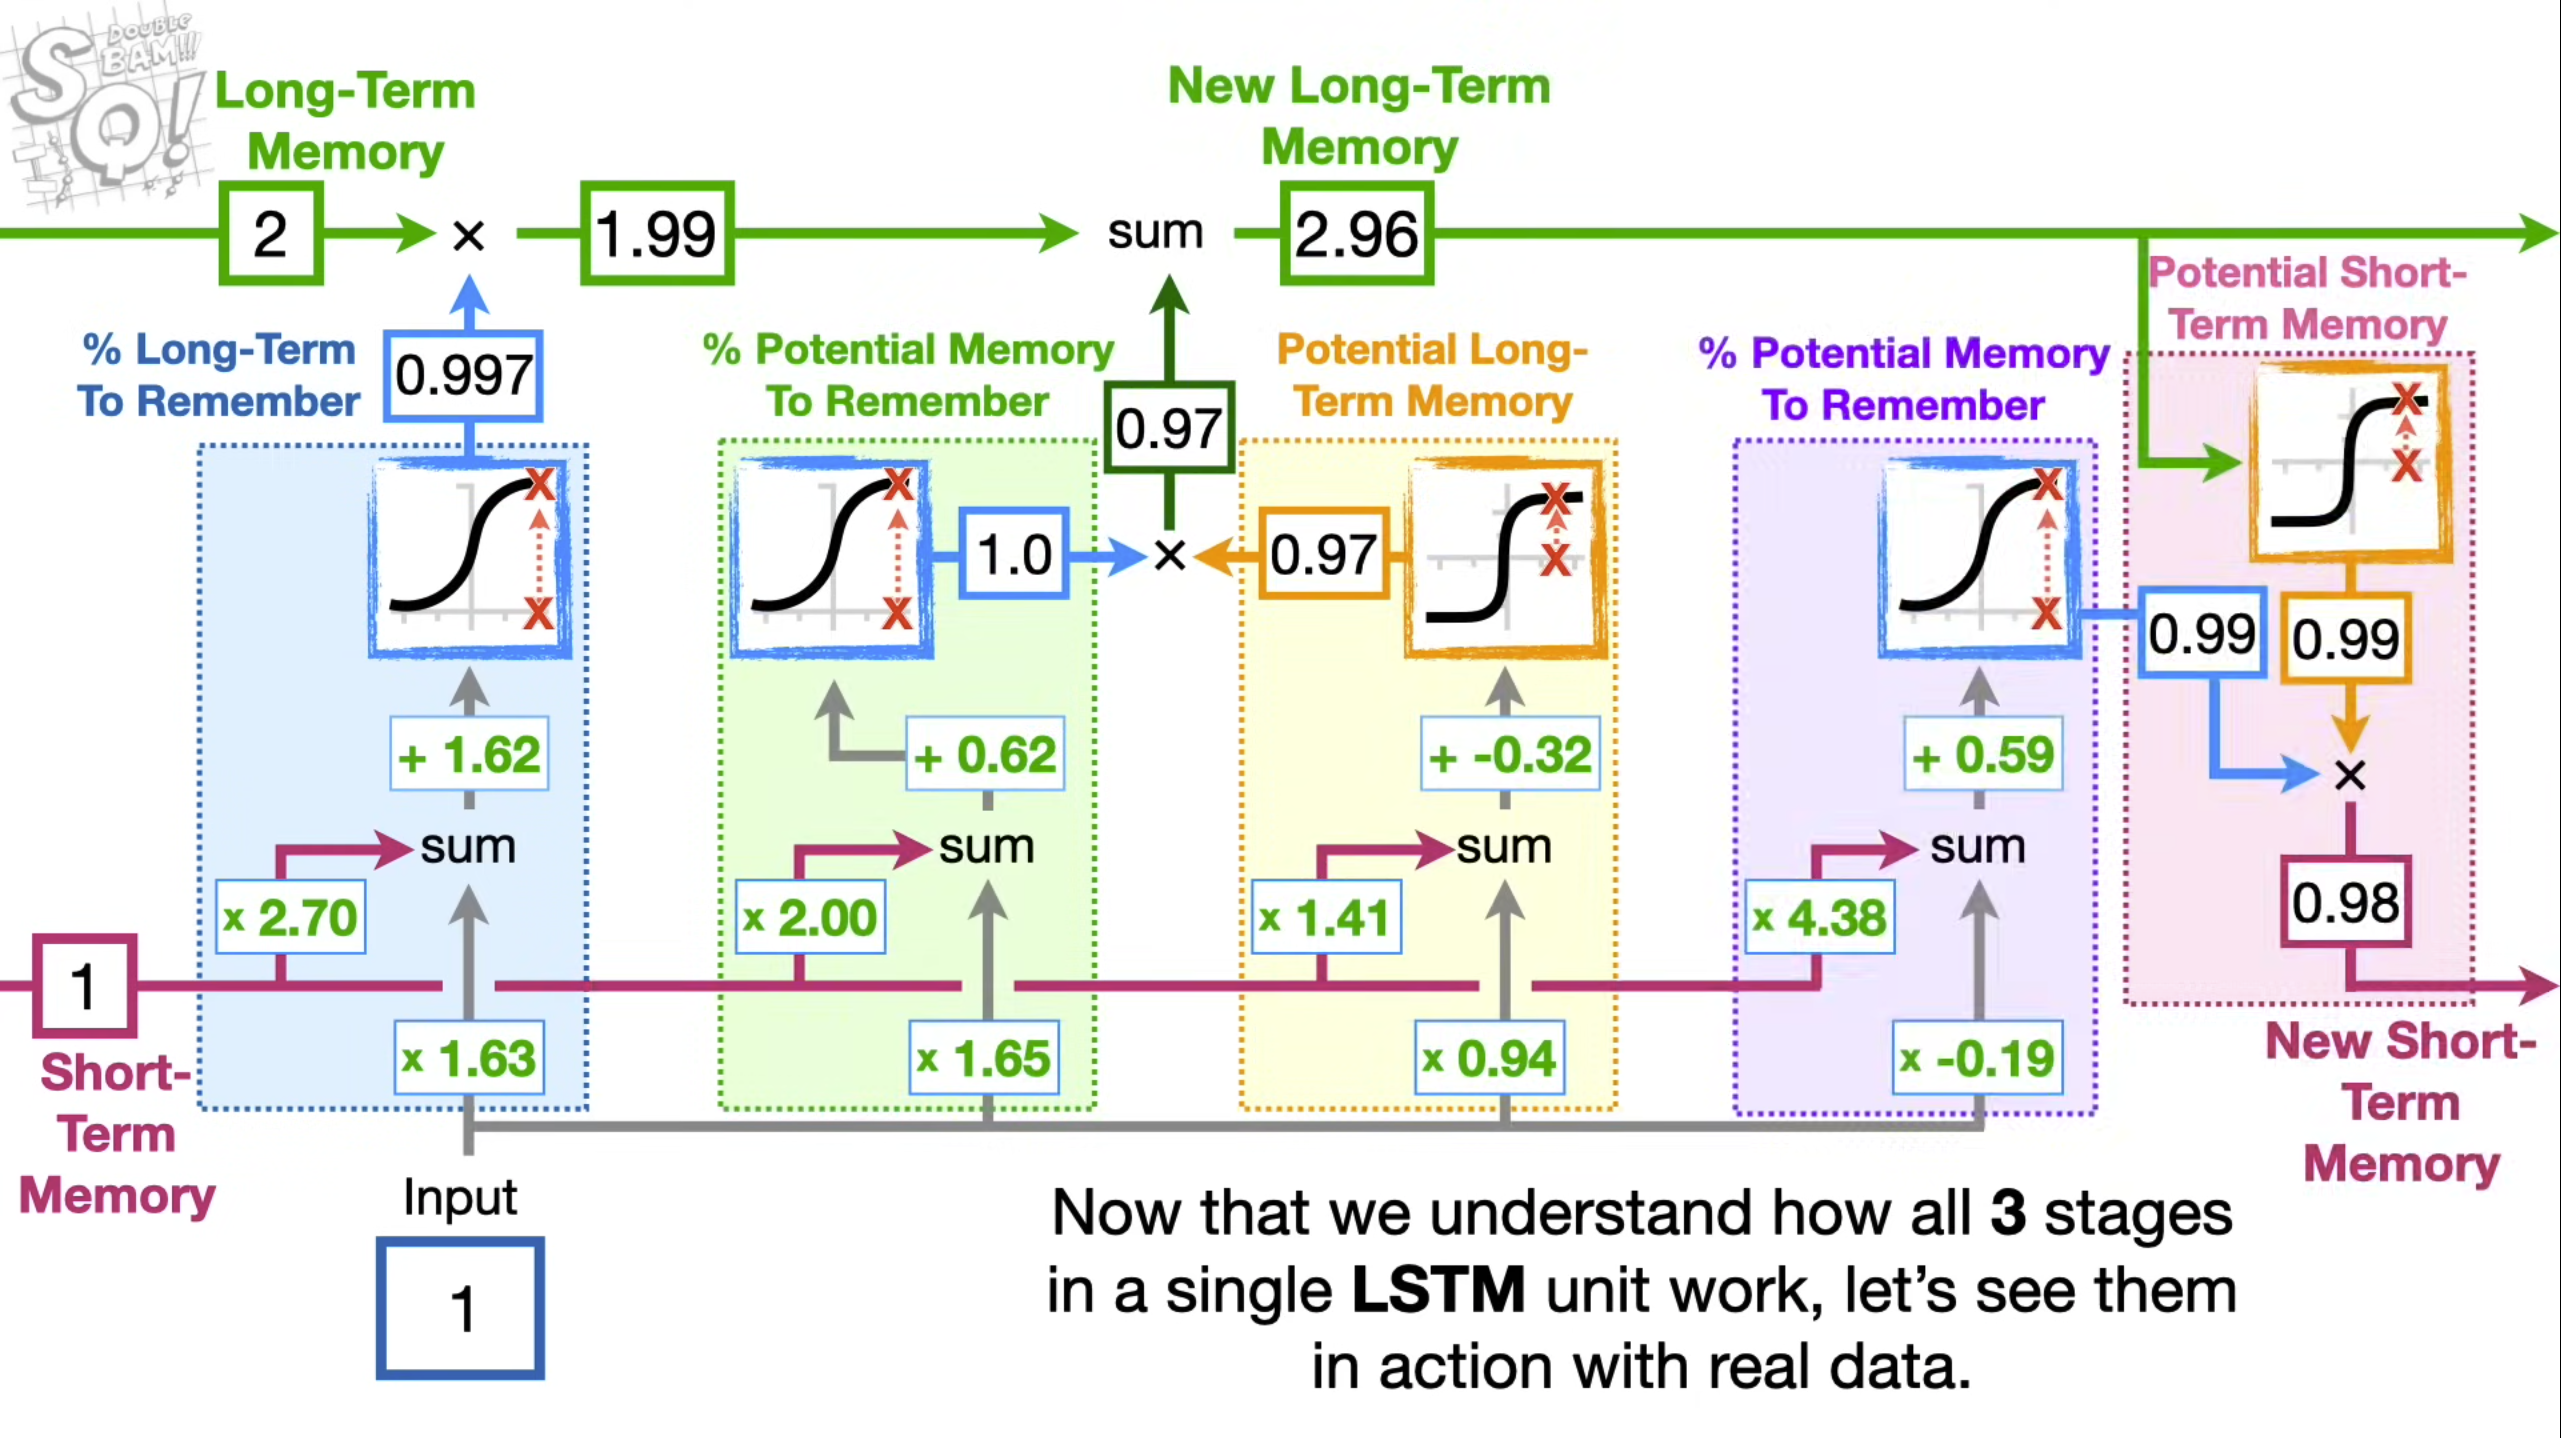

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMbyHand(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(42)  # Set the seed for reproducibility

        # Initialize weights with a normal distribution and biases as zeros.

        # Forget Gate Parameters:
        
        self.wlr1 = nn.Parameter(torch.tensor([2.7]))   # Weight for the previous short-term memory in the forget gate calculation.
        self.wlr2 = nn.Parameter(torch.tensor([1.63]))  # Weight for the current input in the forget gate calculation.
        self.blr1 = nn.Parameter(torch.tensor([1.62]))  # Bias for the forget gate.

        # Input Gate Parameters:
        self.wpr1 = nn.Parameter(torch.tensor([2.0]))   # Weight for the previous short-term memory in the input gate calculation.
        self.wpr2 = nn.Parameter(torch.tensor([1.65]))  # Weight for the current input in the input gate calculation.
        self.bpr1 = nn.Parameter(torch.tensor([0.62]))  # Bias for the input gate.

        # Candidate Memory Parameters:
        self.wp1 = nn.Parameter(torch.tensor([1.41]))   # Weight for the previous short-term memory in the candidate memory calculation.
        self.wp2 = nn.Parameter(torch.tensor([0.94]))   # Weight for the current input in the candidate memory calculation.
        self.bp1 = nn.Parameter(torch.tensor([-0.32]))  # Bias for the candidate memory.

        # Output Gate Parameters:
        self.wo1 = nn.Parameter(torch.tensor([4.38]))   # Weight for the previous short-term memory in the output gate calculation.
        self.wo2 = nn.Parameter(torch.tensor([-0.19]))  # Weight for the current input in the output gate calculation.
        self.bo1 = nn.Parameter(torch.tensor([0.59]))   # Bias for the output gate.

    def lstm_unit(self, x, long_mem, short_mem):
        # Stage 1: Determine the percentage of the current long-term memory to keep.
        long_keep = torch.sigmoid(short_mem * self.wlr1 + x * self.wlr2 + self.blr1)
        print(f"Long-term memory keep percentage: {long_keep.item():.4f}")
        
        # Stage 2: Create new potential long-term memory and determine its contribution.
        pot_keep = torch.sigmoid(short_mem * self.wpr1 + x * self.wpr2 + self.bpr1)
        pot_mem  = torch.tanh(short_mem * self.wp1 + x * self.wp2 + self.bp1)
        new_long = long_mem * long_keep + pot_keep * pot_mem
        print(f"Potential memory: {pot_mem.item():.4f}")
        print(f"Potential keep percentage: {pot_keep.item():.4f}")
        print(f"New long-term memory: {new_long.item():.4f}")
        
        # Stage 3: Create new short-term memory based on the updated long-term memory.
        out_gate  = torch.sigmoid(short_mem * self.wo1 + x * self.wo2 + self.bo1)
        new_short = torch.tanh(new_long) * out_gate
        print(f"Output gate percentage: {out_gate.item():.4f}")
        print(f"New short-term memory: {new_short.item():.4f}")
        
        return new_long, new_short

    def forward(self, input_seq):
        # Initialize long-term and short-term memories.
        long_mem, short_mem = 2, 1
        
        # Process each element in the input sequence.
        for x in input_seq:
            long_mem, short_mem = self.lstm_unit(x, long_mem, short_mem)
        
        # Return the final short-term memory as output.
        return short_mem

# Example usage:
if __name__ == '__main__':
    model = LSTMbyHand()
    
    # Create a dummy input
    dummy_input = torch.tensor([1])
    
    # Forward pass through the model.
    output = model(dummy_input)
    print("Output:", output)
    
    # Example of setting up an optimizer and computing a simple loss.
    optimizer = optim.Adam(model.parameters())
    target = torch.tensor([0.5])
    loss = (output - target) ** 2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 